In [1]:
from dataclasses import asdict
import networkx as nx

from gg_project.vertex_params import VertexType, VertexParams
from gg_project.productions.p2 import Production2
from gg_project.vis import draw

In [2]:
def mk_vertex(t, pos, level):
    return asdict(VertexParams(vertex_type=t, position=pos, level=level))

In [3]:
p2 = Production2()

## Happy Path

In [4]:
graph_p1 = nx.Graph()

graph_p1.add_nodes_from(
    [
        (0, mk_vertex(VertexType.START_USED, (0.5, 0.5), 0)),
        
        (1, mk_vertex(VertexType.EXTERIOR, (0.0, 0.0), 1)),
        (2, mk_vertex(VertexType.EXTERIOR, (0.0, 1.0), 1)),
        (3, mk_vertex(VertexType.EXTERIOR, (1.0, 0.0), 1)),
        (4, mk_vertex(VertexType.EXTERIOR, (1.0, 1.0), 1)),
        
        (5, mk_vertex(VertexType.INTERIOR, None, 1)),
        (6, mk_vertex(VertexType.INTERIOR, None, 1))
    ]
)

graph_p1.add_edges_from(
    [
        (0, 5),
        (0, 6),
        
        (1, 2),
        (1, 3),
        (2, 3),
        (2, 4),
        (3, 4),
        
        (1, 5),
        (2, 5),
        (3, 5),
        (2, 6),
        (3, 6),
        (4, 6),
    ]
)

In [5]:
isomorphic_subgraph1 = p2.find_isomorphic_to_left_side(graph_p1)

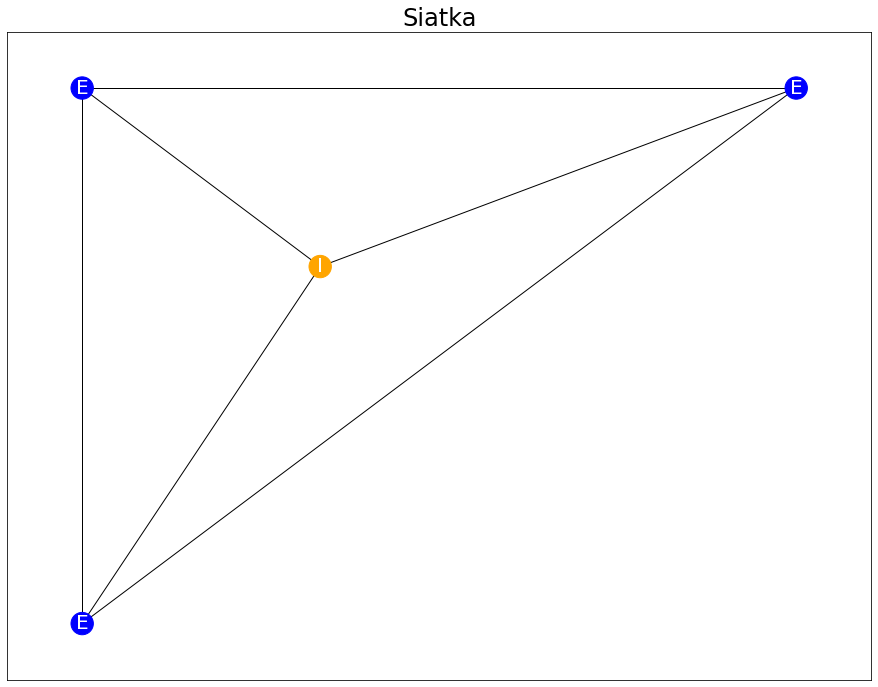

In [6]:
draw(isomorphic_subgraph1, figsize=(12, 9))

In [7]:
p1_after_first_p2 = p2.apply(graph_p1, isomorphic_subgraph1)

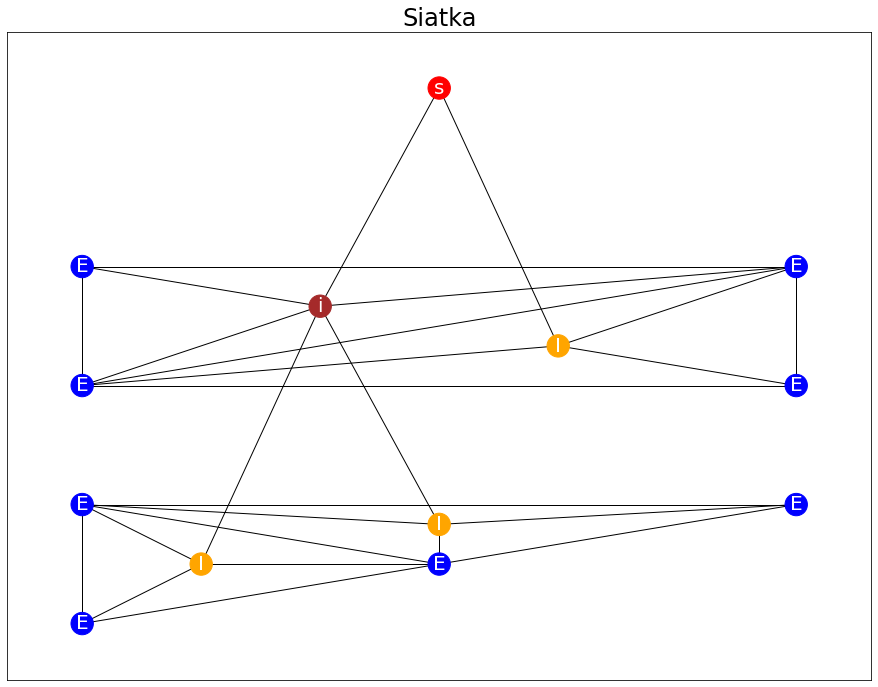

In [8]:
draw(p1_after_first_p2, figsize=(12, 9))

In [9]:
isomorphic_subgraph2 = p2.find_isomorphic_to_left_side(p1_after_first_p2)

In [10]:
p1_after_second_p2 = p2.apply(p1_after_first_p2, isomorphic_subgraph2)

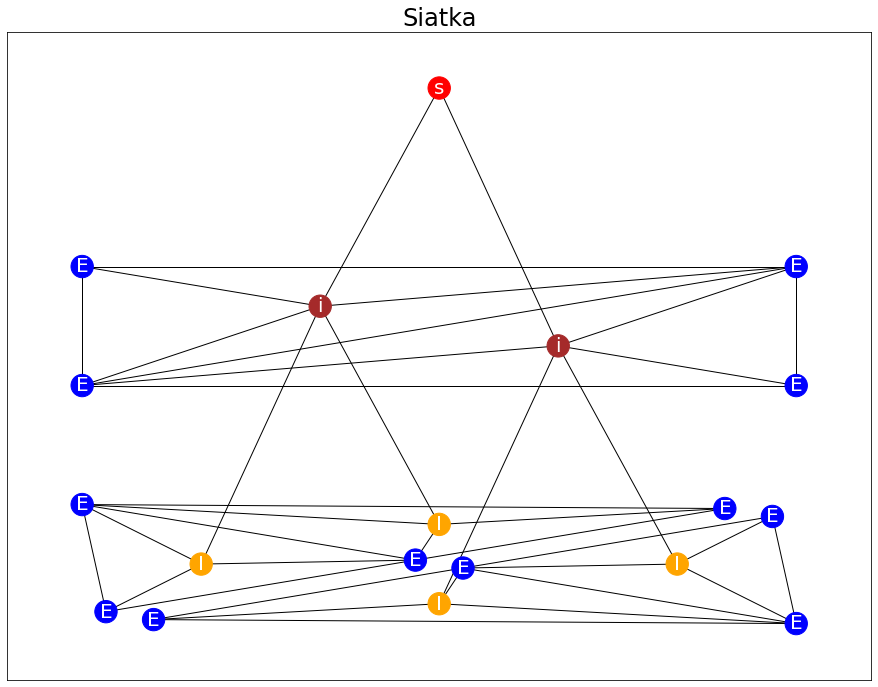

In [11]:
draw(p1_after_second_p2, figsize=(12, 9))

## Edge-cases

### Graf bez krawędzi zewnętrznej

In [17]:
edge_case1 = nx.Graph()

edge_case1.add_nodes_from(
    [
        (1, mk_vertex(VertexType.EXTERIOR, (0.0, 0.0), 1)),
        (2, mk_vertex(VertexType.EXTERIOR, (0.0, 1.0), 1)),
        (3, mk_vertex(VertexType.EXTERIOR, (1.0, 0.0), 1)),        
        (4, mk_vertex(VertexType.INTERIOR, None, 1)),
    ]
)

edge_case1.add_edges_from(
    [
        (1, 2),
        (2, 3),
        (1, 4),
        (2, 4),
        (3, 4)
    ]
)

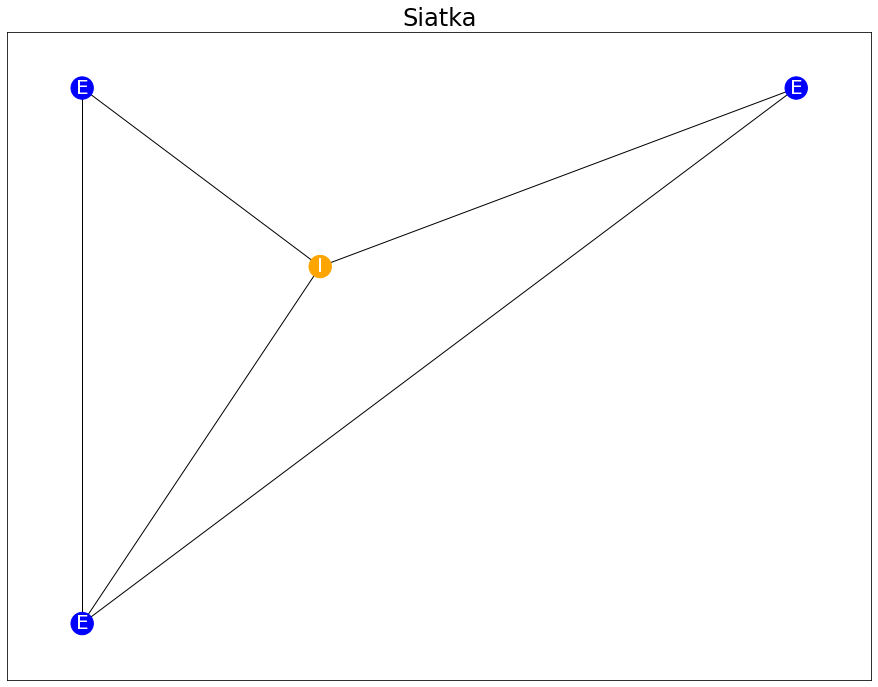

In [18]:
draw(edge_case1, figsize=(12, 9))

In [20]:
print(p2.find_isomorphic_to_left_side(edge_case1))

None


### Graf bez krawędzi wewnętrznej

In [22]:
edge_case2 = nx.Graph()

edge_case2.add_nodes_from(
    [
        (1, mk_vertex(VertexType.EXTERIOR, (0.0, 0.0), 1)),
        (2, mk_vertex(VertexType.EXTERIOR, (0.0, 1.0), 1)),
        (3, mk_vertex(VertexType.EXTERIOR, (1.0, 0.0), 1)),        
        (4, mk_vertex(VertexType.INTERIOR, None, 1)),
    ]
)

edge_case2.add_edges_from(
    [
        (1, 2),
        (2, 3),
        (3, 1),
        (2, 4),
        (3, 4)
    ]
)

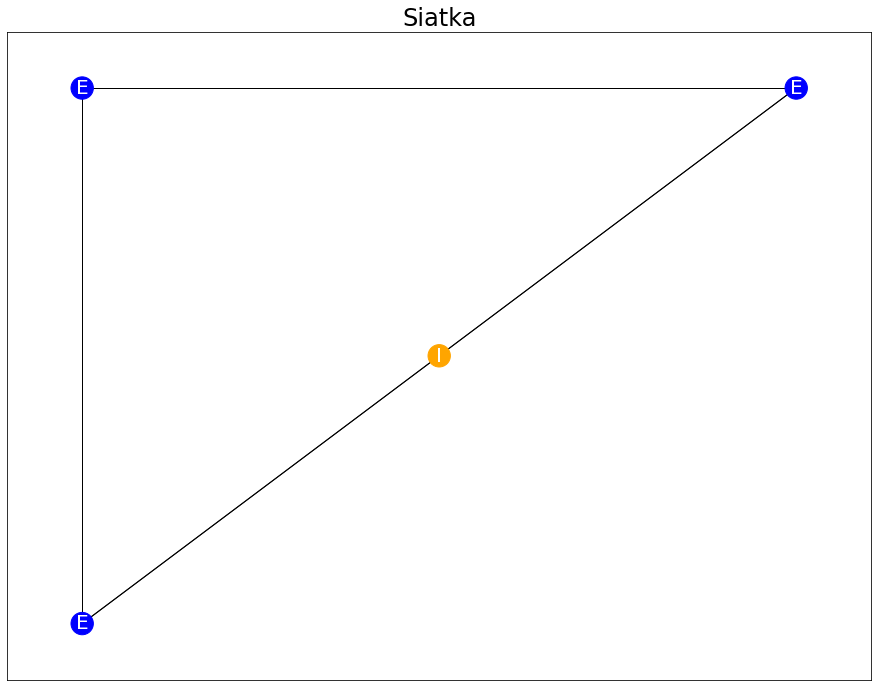

In [23]:
draw(edge_case2, figsize=(12, 9))

In [24]:
print(p2.find_isomorphic_to_left_side(edge_case2))

None


### Graf bez wierzchołka zewnętrznego

In [28]:
edge_case3 = nx.Graph()

edge_case3.add_nodes_from(
    [
        (1, mk_vertex(VertexType.EXTERIOR, (0.0, 1.0), 1)),
        (2, mk_vertex(VertexType.EXTERIOR, (1.0, 0.0), 1)),        
        (3, mk_vertex(VertexType.INTERIOR, None, 1)),
    ]
)

edge_case3.add_edges_from(
    [
        (1, 2),
        (1, 3),
        (2, 3),
    ]
)

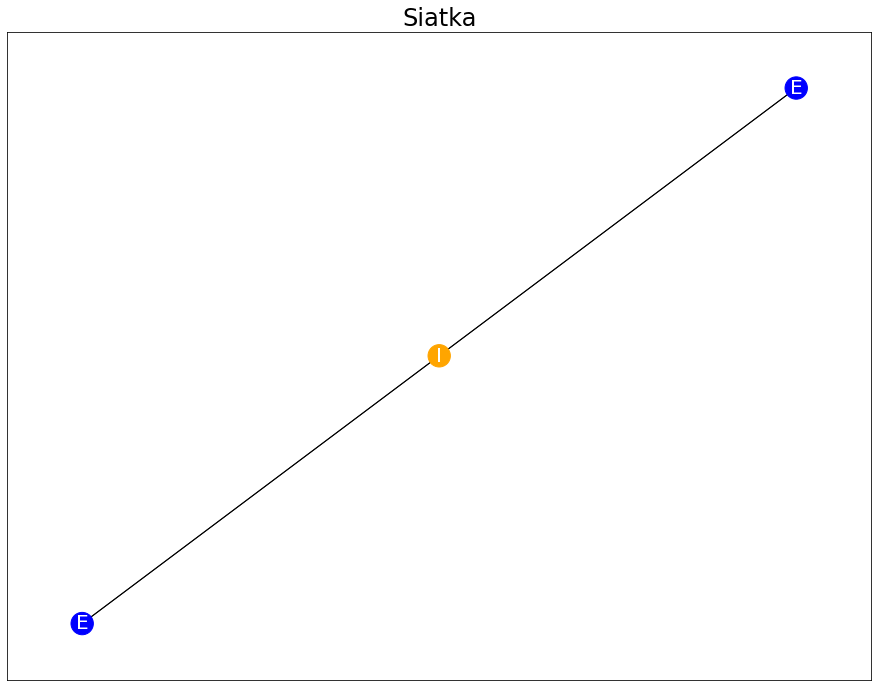

In [29]:
draw(edge_case3, figsize=(12, 9))

In [30]:
print(p2.find_isomorphic_to_left_side(edge_case3))

None


### Graf z dodatkową krawędzią zewnętrzną (lewa strona P3)

In [38]:
edge_case4 = nx.Graph()

edge_case4.add_nodes_from(
    [
        (1, mk_vertex(VertexType.EXTERIOR, (0.0, 0.0), 1)),
        (2, mk_vertex(VertexType.EXTERIOR, (0.0, 1.0), 1)),
        (3, mk_vertex(VertexType.EXTERIOR, (1.0, 0.0), 1)),
        (4, mk_vertex(VertexType.INTERIOR, None, 1)),
        (5, mk_vertex(VertexType.EXTERIOR, (0.5, 0.5), 1)),        

    ]
)

edge_case4.add_edges_from(
    [
        (1, 2),
        (3, 1),
        (3, 5),
        (2, 5),
        
        (1, 4),
        (2, 4),
        (3, 4)
    ]
)

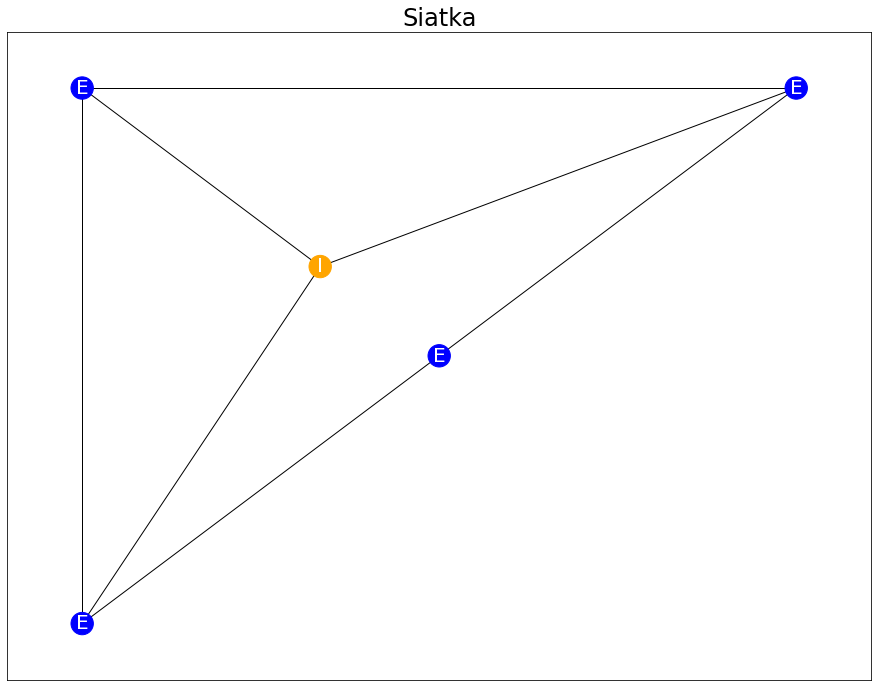

In [39]:
draw(edge_case4, figsize=(12, 9))

In [40]:
print(p2.find_isomorphic_to_left_side(edge_case4))

None
